![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# The Buffon's Needle Problem

Buffon's Needle is one of the oldest problems in geometric probability, originating in 1777.

Through this problem, it is possible to estimate the value of $\pi$ by dropping needles of length $l$ on a sheet of paper that has parallel lines a distance of $d$ apart. For this exercise, we'll make both $l$ and $s$ equal to $1$.

<img src="BuffonNeedle.gif" width="400"/>

### Try it yourself! Use the cell below to run the experiment:

Box(children=(Button(button_style='primary', description='Drop a needle', layout=Layout(height='40px', width='150px'), style=ButtonStyle()), Button(button_style='warning', description='Reset', layout=Layout(height='40px', width='150px'), style=ButtonStyle())), layout=Layout(justify_content='flex-start'))

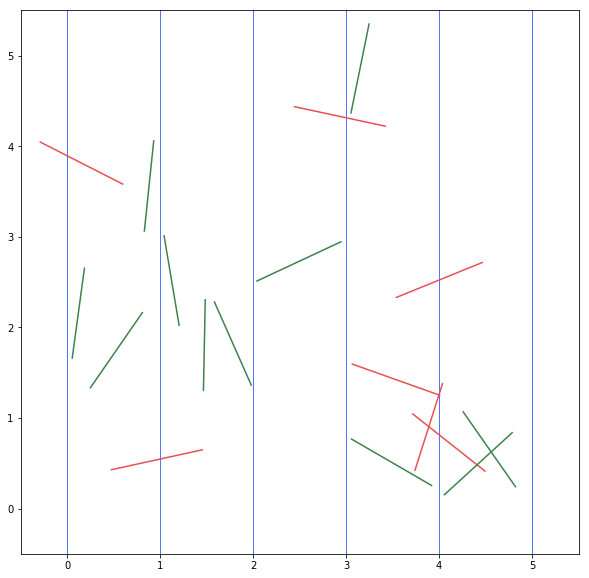

7 needles intersect with a line, and 11 do not.

38.889% of the needles intersect with a line.



In [1]:
from ipywidgets import widgets, Layout, Button, Box
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random as rand

%matplotlib inline

#Setting up button and box layouts:
button_layout = Layout(height='40px', width='150px')
box_layout = Layout(justify_content = "flex-start")

#Creates the buttons:
button1 = widgets.Button(description = "Drop a needle", button_style = "primary", layout = button_layout)
button2 = widgets.Button(description = "Reset", button_style = "warning", layout = button_layout)

buttons = [button1, button2]

#Creates the box:
button_box = Box(children = buttons, layout = box_layout)

#Running list of dropped needles. Each entry is a tuple of (horizontal values, vertical values, color)
needles = []

color = ""
crossed = 0
not_crossed = 0

#Setting up graph
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(axis='x', color = "#2653FF")

#Button handlers:
def drop_needle(button):
    
    global needles, color, crossed, not_crossed
    
    #Generating the center point and angle of the needle:
    center_x = rand.uniform(0,5)
    center_y = rand.uniform(0,5)
    angle = np.radians(rand.uniform(0,180))
    
    #Calculating the endpoints of the needle:
    x1 = center_x - (np.sin(angle)*.5)
    x2 = center_x + (np.sin(angle)*.5)
    
    y1 = center_y - (np.cos(angle)*.5)
    y2 = center_y + (np.cos(angle)*.5)
    
    horiz = np.linspace(x1, x2)
    vert = np.linspace(y1, y2)
    
    #Checking if the needle crosses a line:
    if x1 < 0 < x2 or x1 > 0 > x2 or x1 < 1 < x2 or x1 > 1 > x2 or x1 < 2 < x2 or x1 > 2 > x2 or x1 < 3 < x2 or x1 > 3 > x2 \
    or x1 < 4 < x2 or x1 > 4 > x2 or x1 < 5 < x2 or x1 > 5 > x2:
        
        color = "#E55151"
        crossed += 1
        
    else:
        
        color = "#3F814A"
        not_crossed += 1
        
    #Adding the new needle to the list:
    needle = (horiz, vert, color)
    needles.append(needle)
    
    #Clearing output, redisplaying buttons and graph:
    clear_output()
    display(button_box)
    display_needles()
    
    #Printing explanatory text:
    print(f"{crossed} needles intersect with a line, and {not_crossed} do not.\n")

    chance = crossed/(crossed + not_crossed)
    #calc_chance = 2/np.pi
    #calc_pi = 2/chance
    #difference = abs(np.pi - calc_pi)

    print(f"{round(chance*100, 3)}% of the needles intersect with a line.")
    print()
    

def reset(button):
    global needles, color, crossed, not_crossed, fig, ax, button_box
    
    #Resetting needles and other variables:
    needles = []

    color = ""
    crossed = 0
    not_crossed = 0

    #Resetting graph
    clear_output()
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(axis='x', color = "#2653FF")
    
    #Displaying buttons:
    display(button_box)
    

#Function to display the graph:
def display_needles():
    global needles, fig, ax
    
    #Setting up graph
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(axis='x', color = "#2653FF")
    
    plt.xlim(-.5,5.5)
    plt.ylim(-.5,5.5)
    
    #Plotting needles
    for needle in needles:
        
        horiz = needle[0]
        vert = needle[1]
        color = needle[2]
        
        plt.plot(horiz,vert,color = color)
    
    plt.show()

    
display(button_box)
plt.show()

button1.on_click(drop_needle)
button2.on_click(reset)

### Now let's try dropping more needles!

The cell below will run the same experiment, but will not print the graph to save run time. Try choosing a value of $n$ greater than 1000.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

#Asking for user input on number of trials:
trials = int(input("How many needles would you like to drop? "))

while trials < 1:
    
    trials = int(input("Please enter a number greater than 0: "))

#length = float(input("What length would you like the needles to be? "))

#while length > 1 or length <= 0:
    
    #length = float(input("Please choose a length less than 1 and greater than 0: "))

length = 1
crossed = 0
not_crossed = 0

#Generating and plotting needles:
for n in range(0, trials):
    
    #Generating the center point and angle of the needle:
    center_x = rand.uniform(0,5)
    center_y = rand.uniform(0,5)
    angle = np.radians(rand.uniform(0,180))
    
    #Calculating the endpoints of the needle:
    x1 = center_x - (np.sin(angle)*.5*length)
    x2 = center_x + (np.sin(angle)*.5*length)
    
    y1 = center_y - (np.cos(angle)*.5*length)
    y2 = center_y + (np.cos(angle)*.5*length)

    
    #Checking if the needle crosses a line:
    if x1 < 0 < x2 or x1 > 0 > x2 or x1 < 1 < x2 or x1 > 1 > x2 or x1 < 2 < x2 or x1 > 2 > x2 or x1 < 3 < x2 or x1 > 3 > x2 \
    or x1 < 4 < x2 or x1 > 4 > x2 or x1 < 5 < x2 or x1 > 5 > x2:
        
        crossed += 1
        
    else:

        not_crossed += 1

print()
print(f"{crossed} needles intersect with a line, and {not_crossed} do not.\n")

chance = crossed/trials
calc_chance = 2*length/np.pi
calc_pi = 2*length/chance
difference = abs(np.pi - calc_pi)

print(f"{round(chance*100, 3)}% of the needles intersect with a line.")
print()
#print(f"Estimating pi using this experiment gives: {calc_pi}")
#print(f"This estimate differs from pi by approximately {round(difference, 5)}.")

How many needles would you like to drop? 1000000

636331 needles intersect with a line, and 363669 do not.

63.633% of the needles intersect with a line.



In [11]:
2/0.63633


3.1430232740873447

# How does it work?

Buffon calculated that the probability $P$ of the dropped needle crossing one of the lines on the paper to be the following, when $l$ and $d$ are both equal to $1$:

\begin{equation*}
P ≈ \frac{2}{\pi}
\end{equation*}

Since $P ≈ \frac{2}{\pi }$, that means $\pi$ can be approximated as $\pi ≈ \frac {2}{P}$.

Now we can use a Monte Carlo simulation in order to estimate $\pi$. This means that we can estimate $P$ by performing the experiment and dropping needles on a page to count what fraction of them intersect with a line, and then use that estimate to calculate $\pi$ from the equation $\pi ≈ \frac {2}{P}$. The more tests we run (i.e. the more needles we drop), the more accurate our estimate of $P$ will be, and by extension, our estimate of $\pi$. Try out how well this approximation works using this formula and the widget above!

If you are interested in this problem, please see this video by Michel van Biezen on the Buffon's Needle problem for more information:

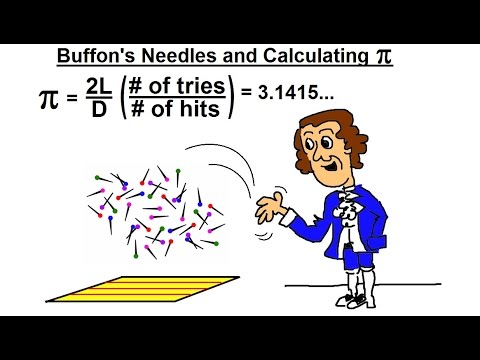

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('hHSWNsnJGeE')

## Today we talked about the connection between Monte Carlo simulations, probabilistic reasoning, and natural language processing.
### See if you can figure out all the ways that these "heuristics" are used in the following video.

In [13]:
from IPython.display import HTML
HTML('<H1><p><iframe width="560" height="315" src="https://www.youtube.com/embed/Nu-nlQqFCKg?rel=0&amp;start=387;showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen> </iframe></p>' )

**Sources:**

http://mathworld.wolfram.com/BuffonsNeedleProblem.html

https://mste.illinois.edu/activity/buffon/

https://www.youtube.com/watch?v=sJVivjuMfWA

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)